In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/staff-attire-detect-sample-video/kaggle_50ep_model.pt
/kaggle/input/staff-attire-detect-sample-video/sample.mp4
/kaggle/input/staff-attire-detect-sample-video/kaggle_100ep_model.pt


In [2]:
!nvidia-smi

Sun Oct 29 16:05:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5016.7/8062.4 GB disk)


In [4]:
import os
from ultralytics import YOLO
from IPython.display import display, Image

HOME = os.getcwd()
print(HOME)

/kaggle/working


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Download the dataset version based on your modification 
# Simlpy choose the dataset you want and export with generated code as below
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("qi-ming").project("staff-attire-identification")
dataset = project.version(4).download("yolov8")

/kaggle/working/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 26.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled opencv-python-headless-4.8.0.76
  Attempting 

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Staff-Attire-Identification-4 in yolov8:: 100%|██████████| 1668/1668 [00:00<00:00, 5153.63it/s]


#### Train model

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=960 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 194MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/datasets/Staff-Attire-Identification-4/data.yaml, epochs=50, patience=50, batch=16, imgsz=960, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False

#### Training Results

/kaggle/working


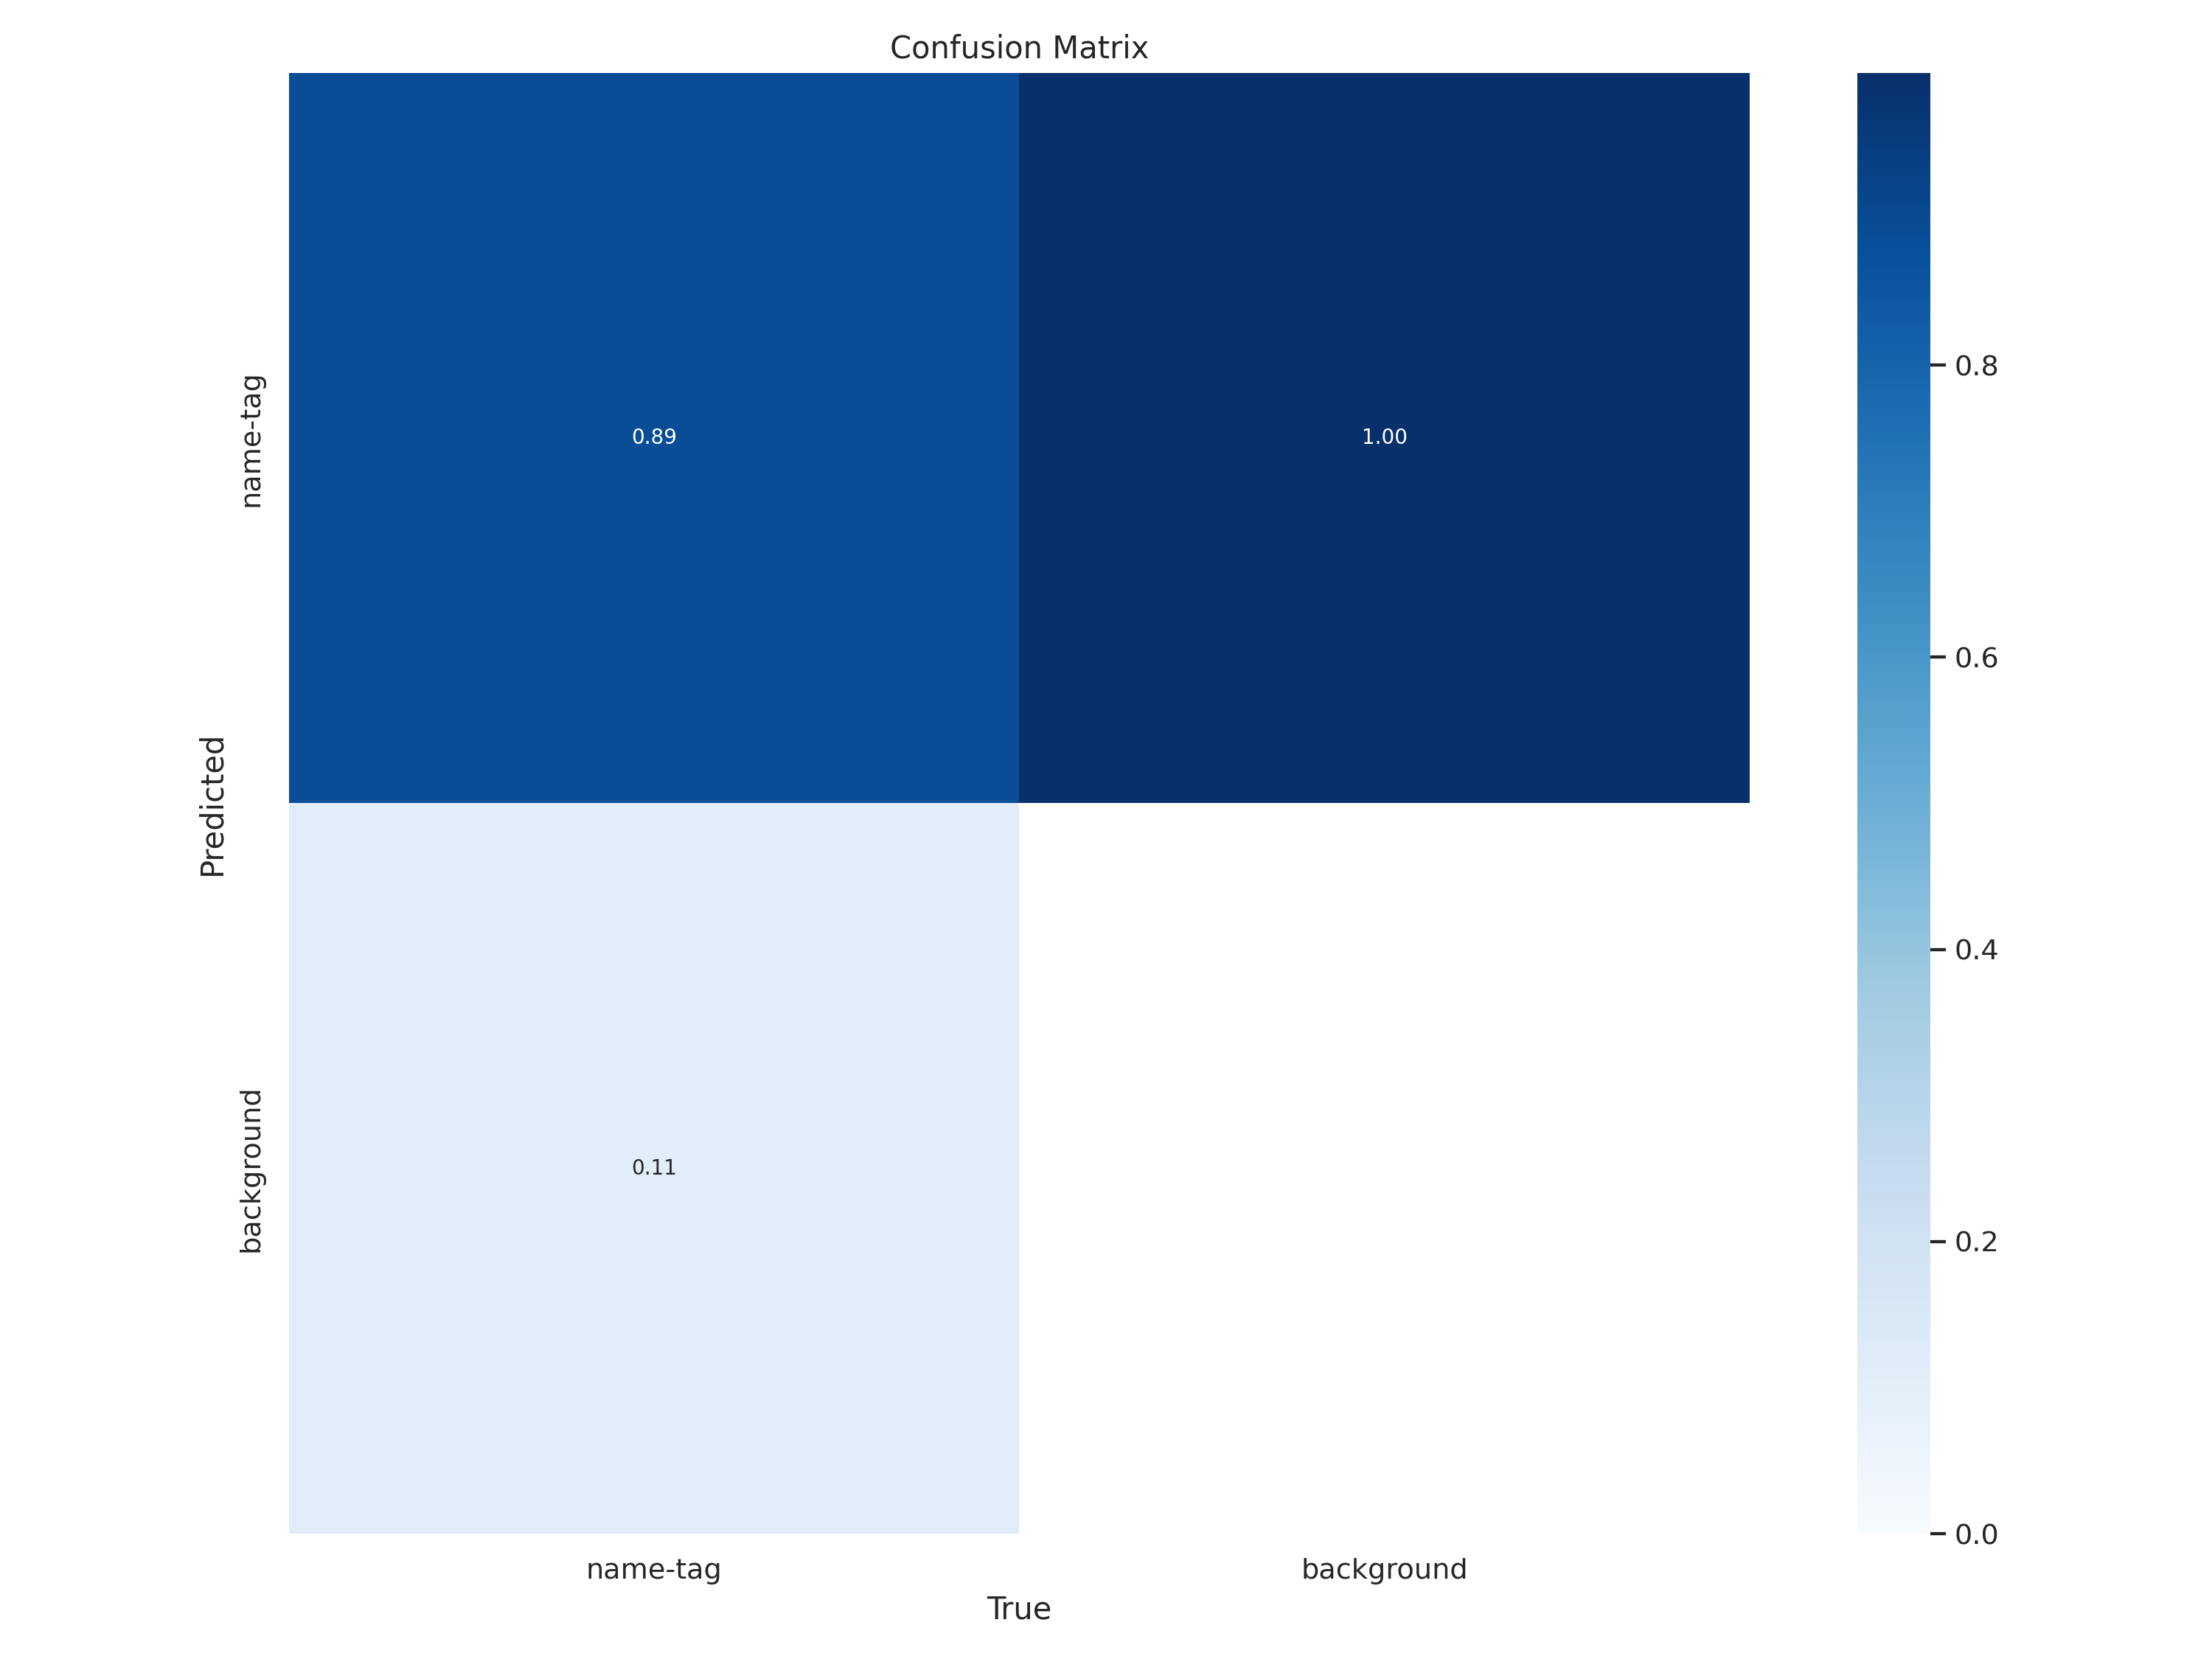

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

- show how many correct detect name-tag

/kaggle/working


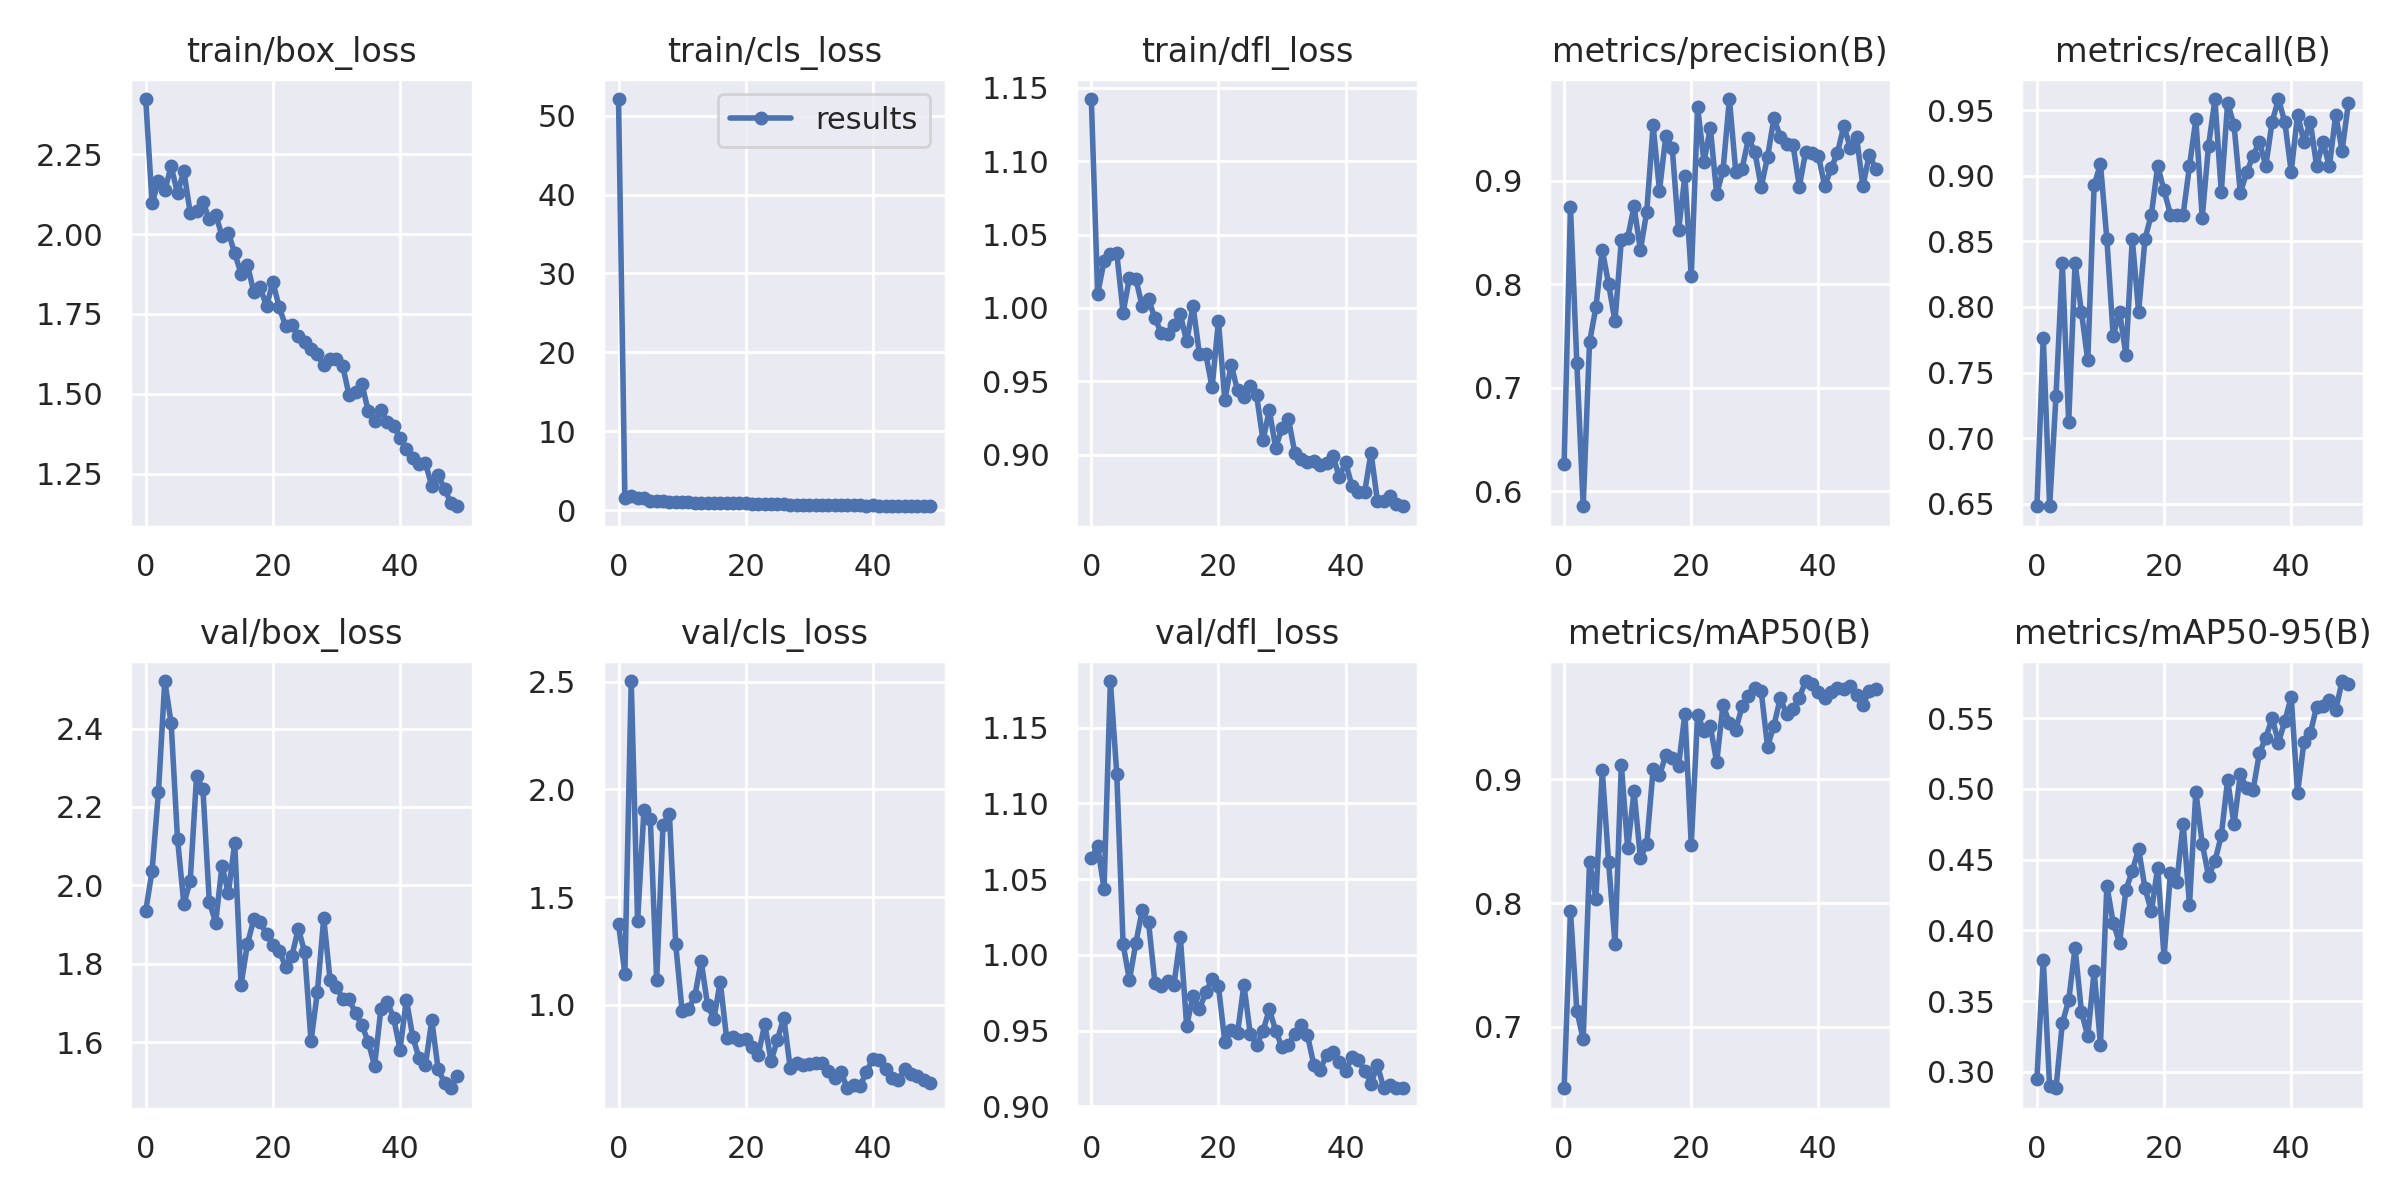

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


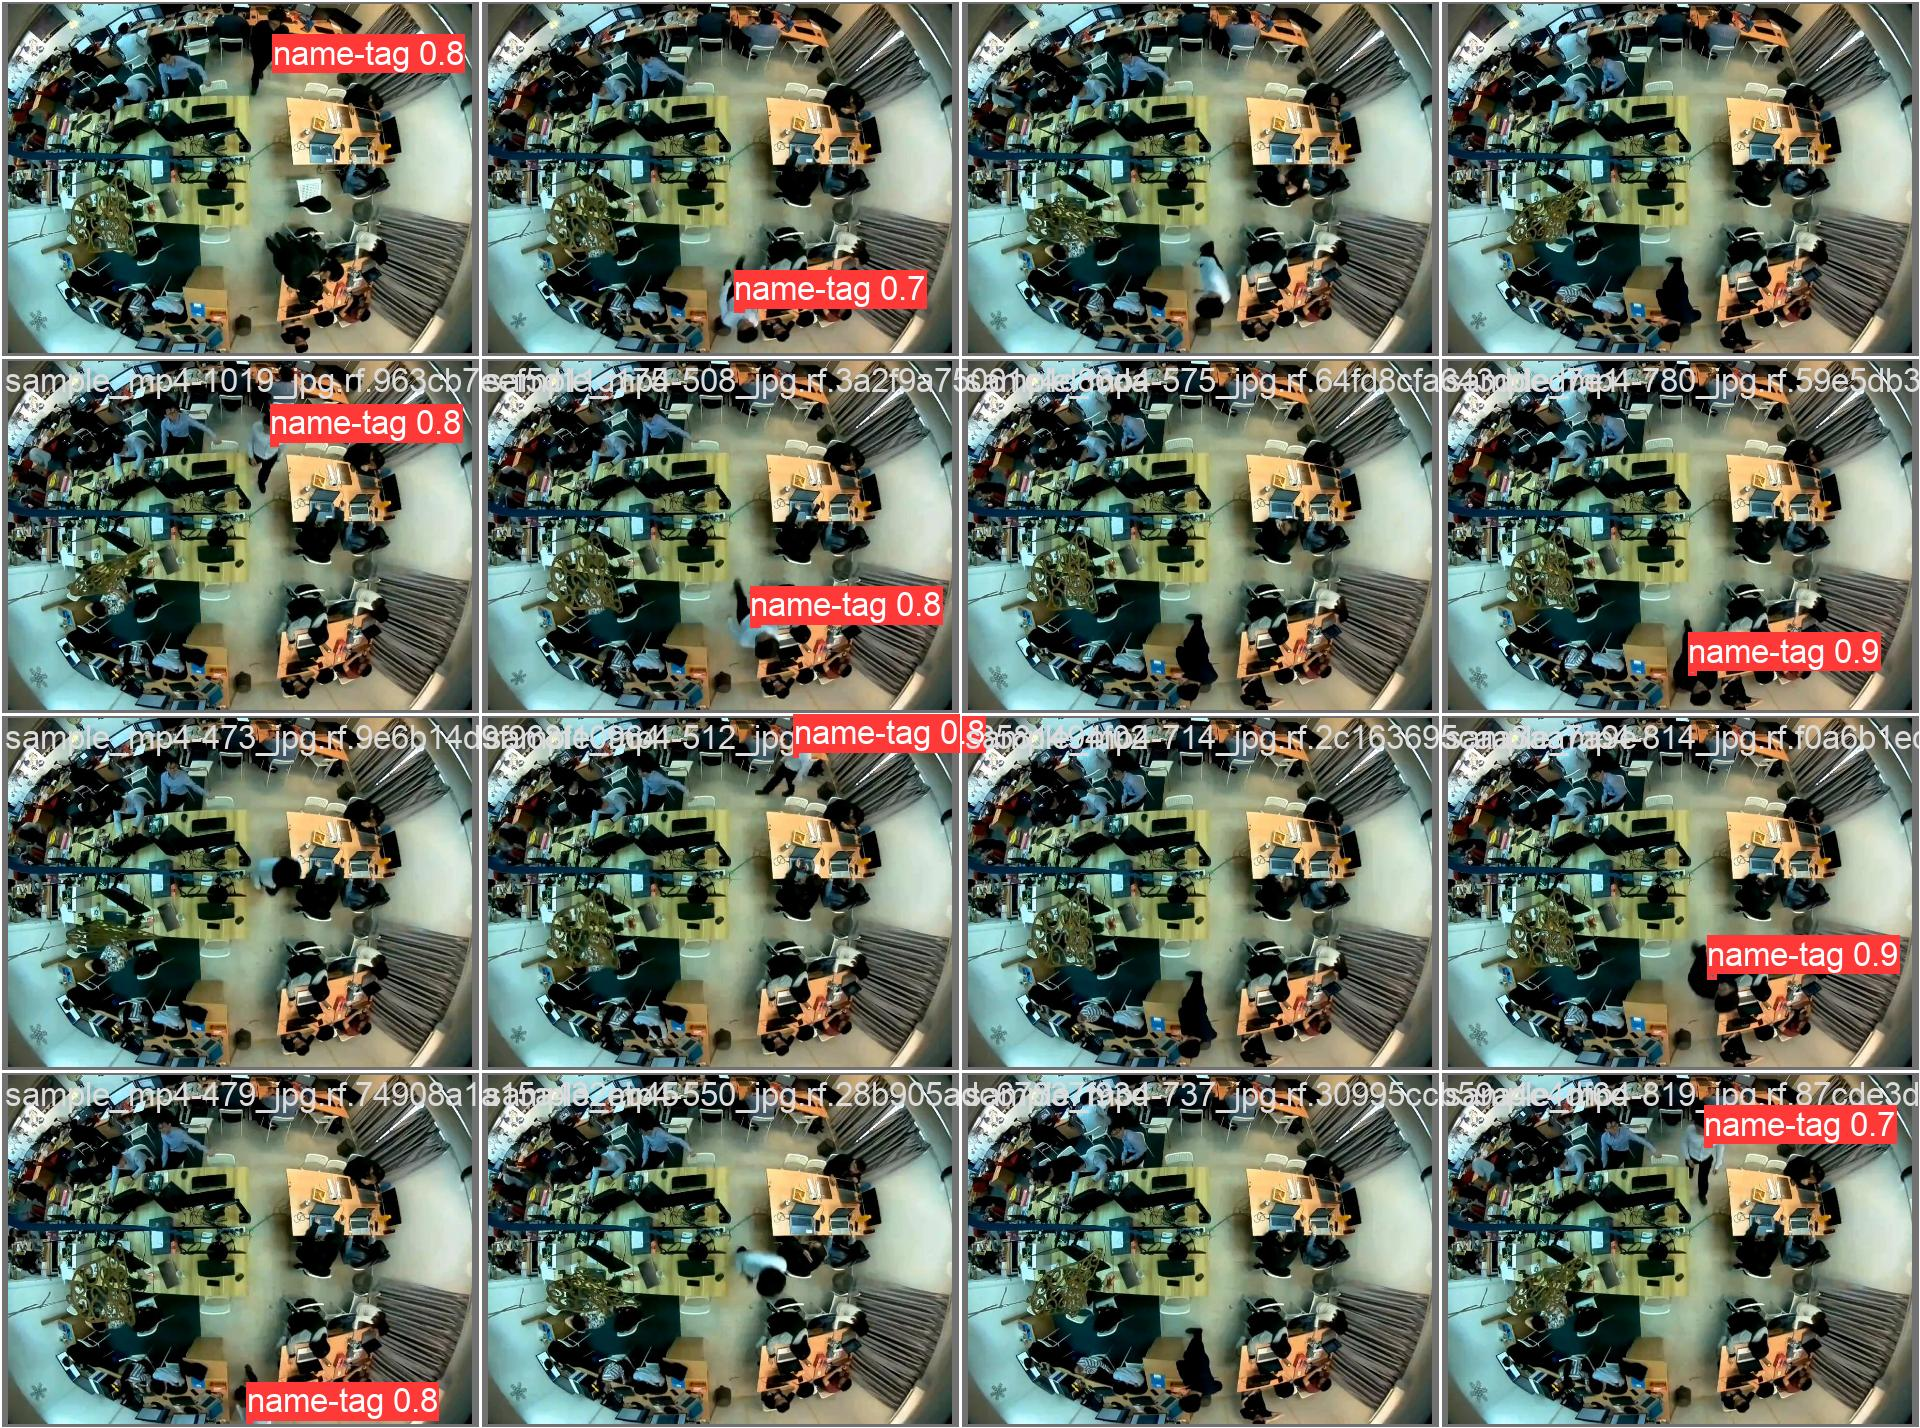

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

#### Validate the model

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/valid/label
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.926      0.926      0.972      0.595
Speed: 6.0ms pre-process, 9.3ms inference, 0.0ms loss, 1.6ms post-process per image


#### Predict with model

- predict with test set data

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1013_jpg.rf.5c7ca3f01ad3a27ca195984a7c69e58d.jpg: 736x960 1 name-tag, 68.5ms
image 2/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1016_jpg.rf.3c16bdda6ccb99354fe5a910b215143d.jpg: 736x960 1 name-tag, 9.7ms
image 3/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1021_jpg.rf.f373698fccf02d205e7328db248c56d2.jpg: 736x960 1 name-tag, 9.7ms
image 4/36 /kaggle/working/datasets/Staff-Attire-Identification-

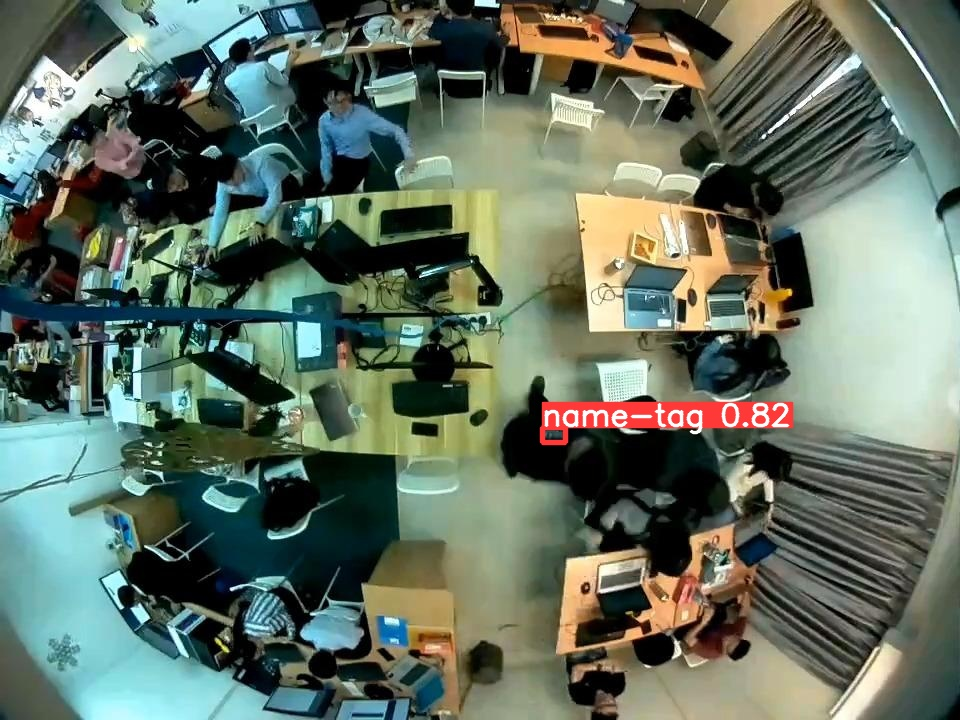

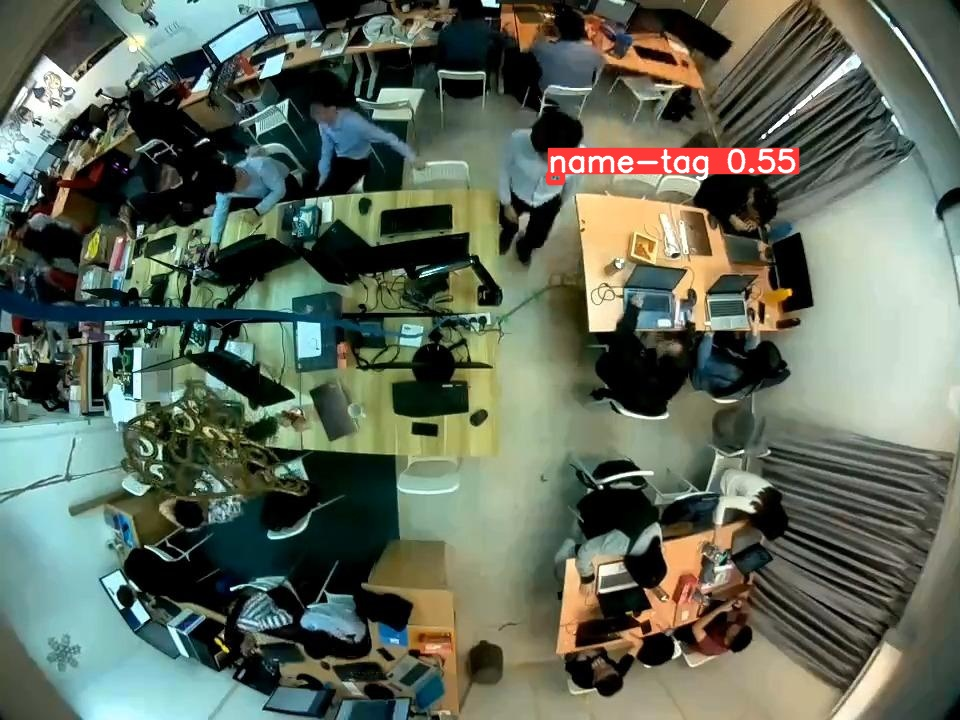

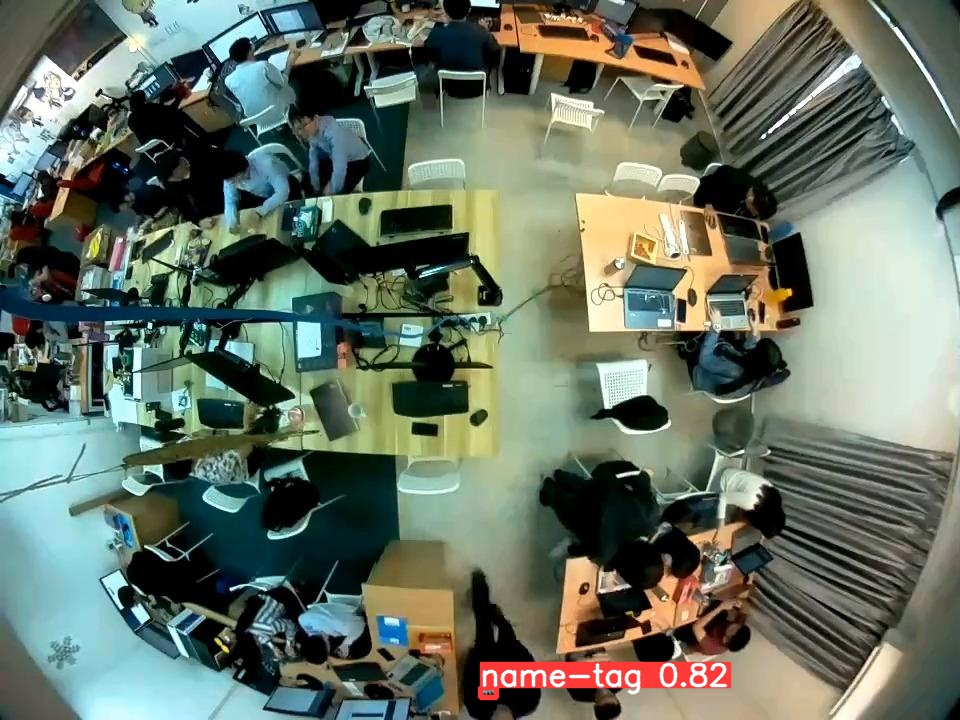

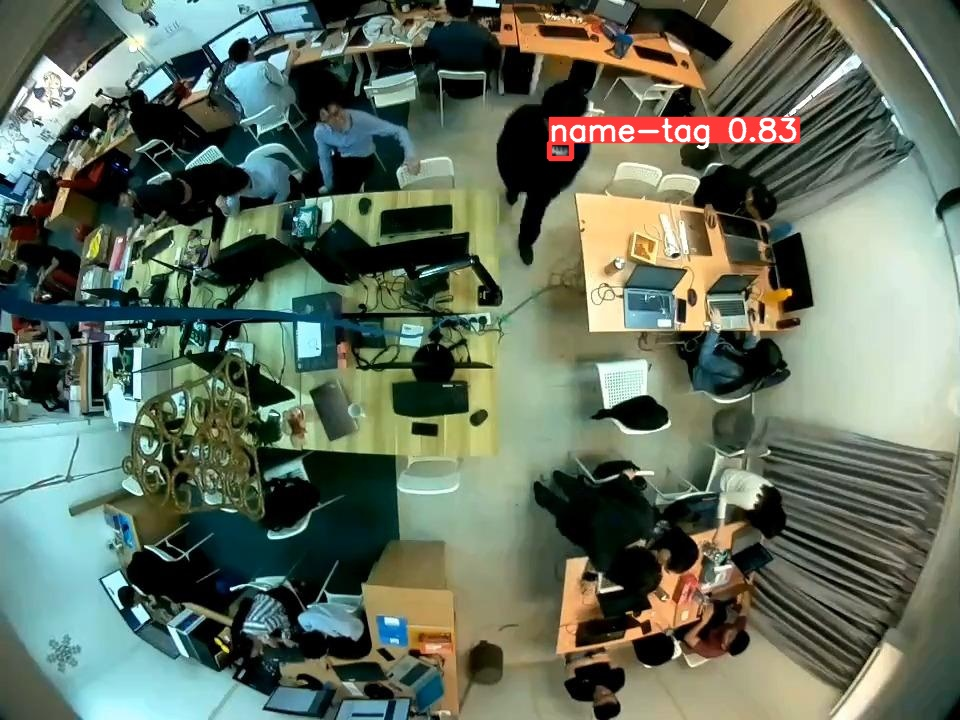

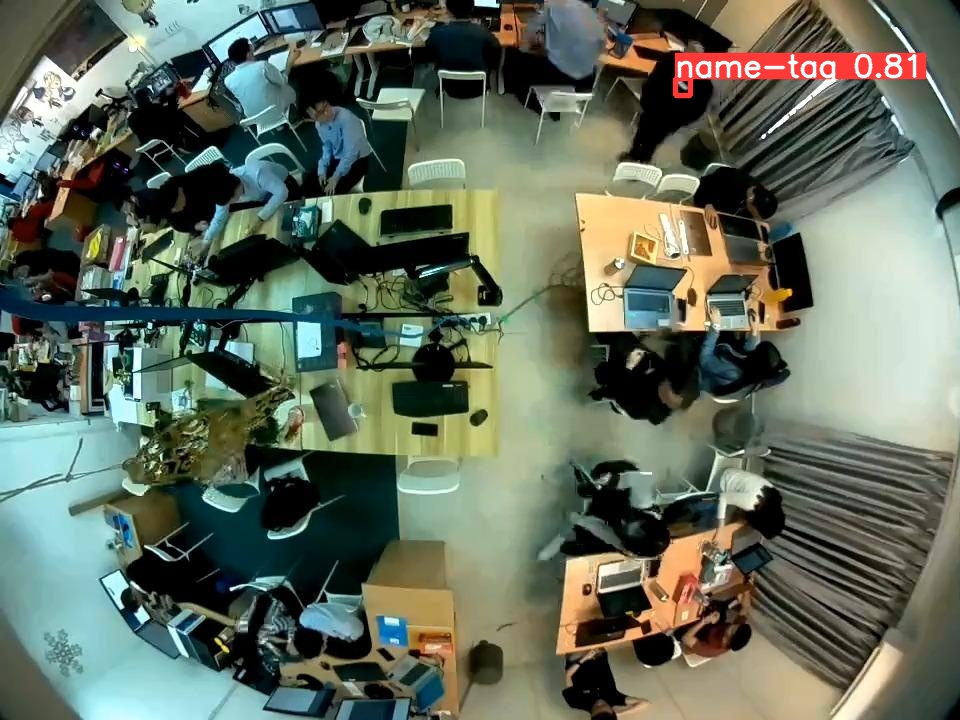

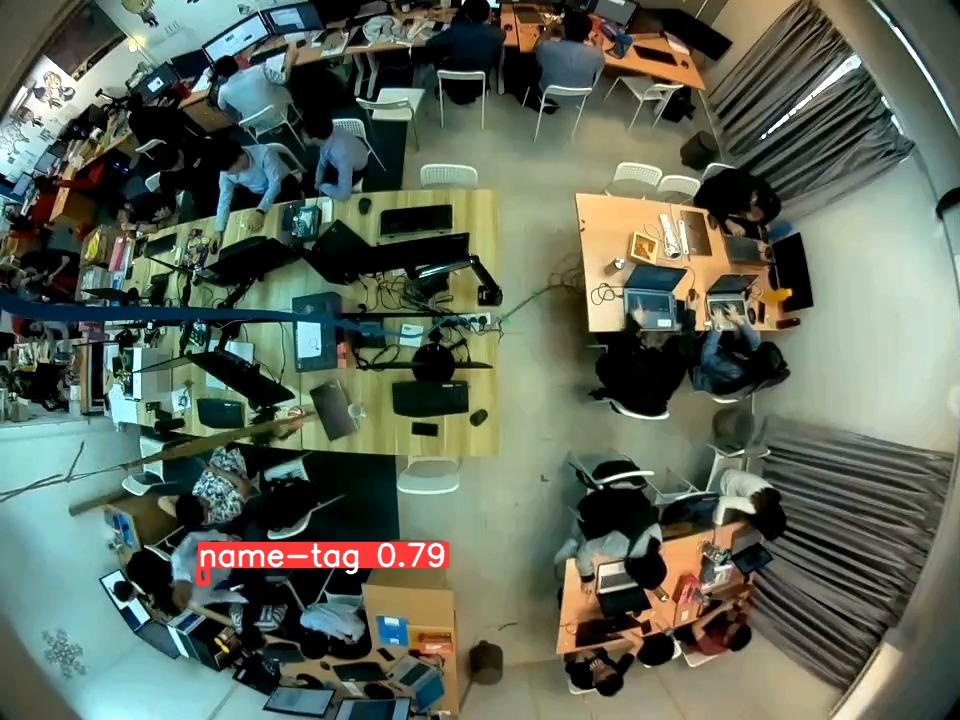

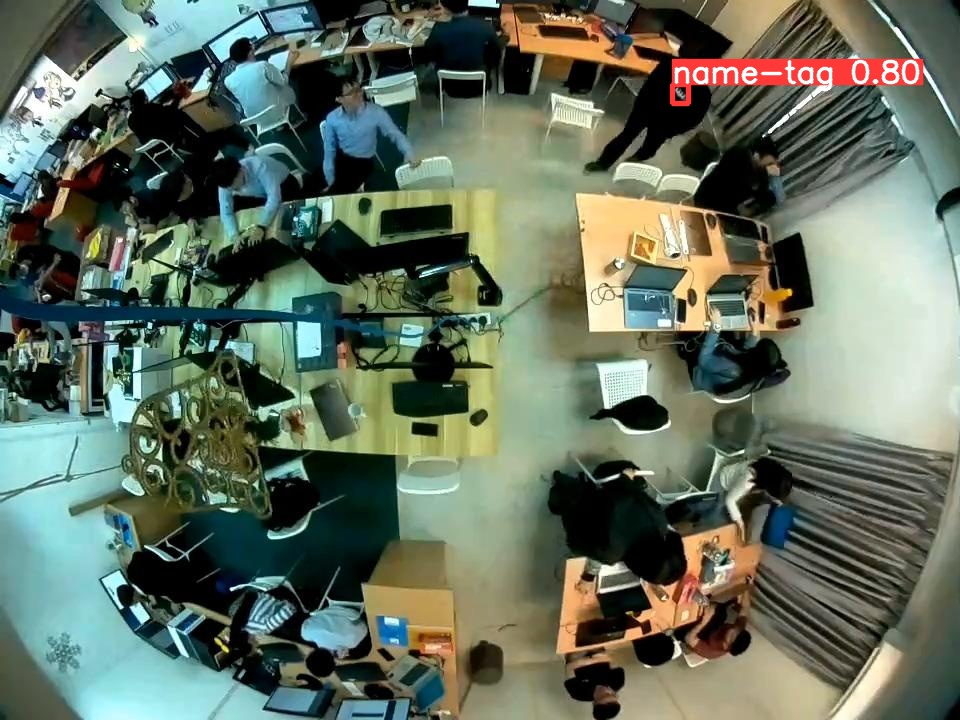

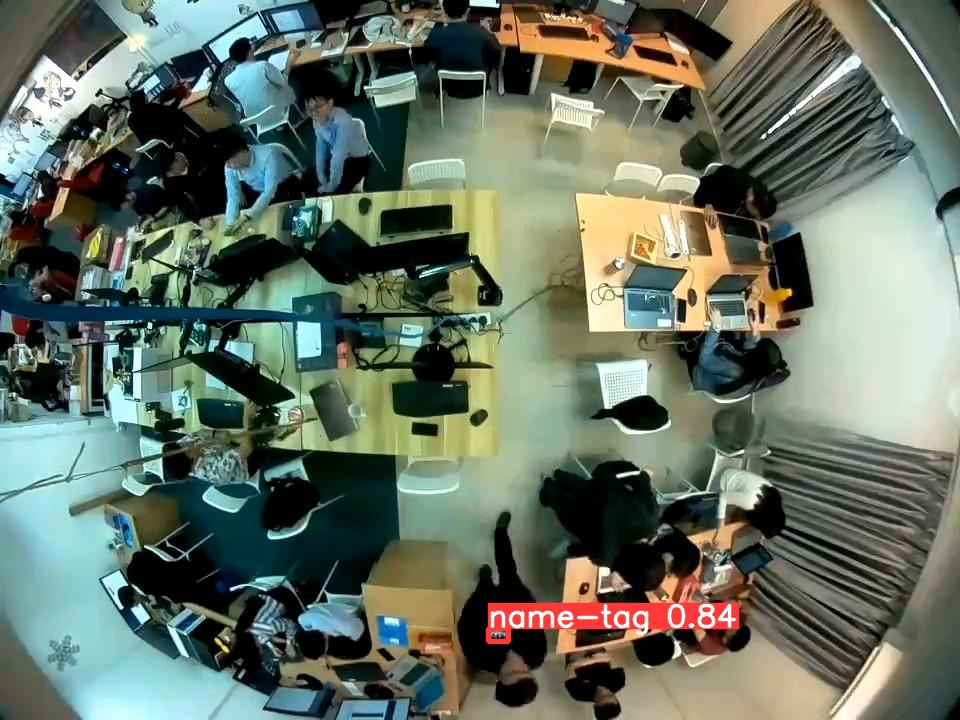

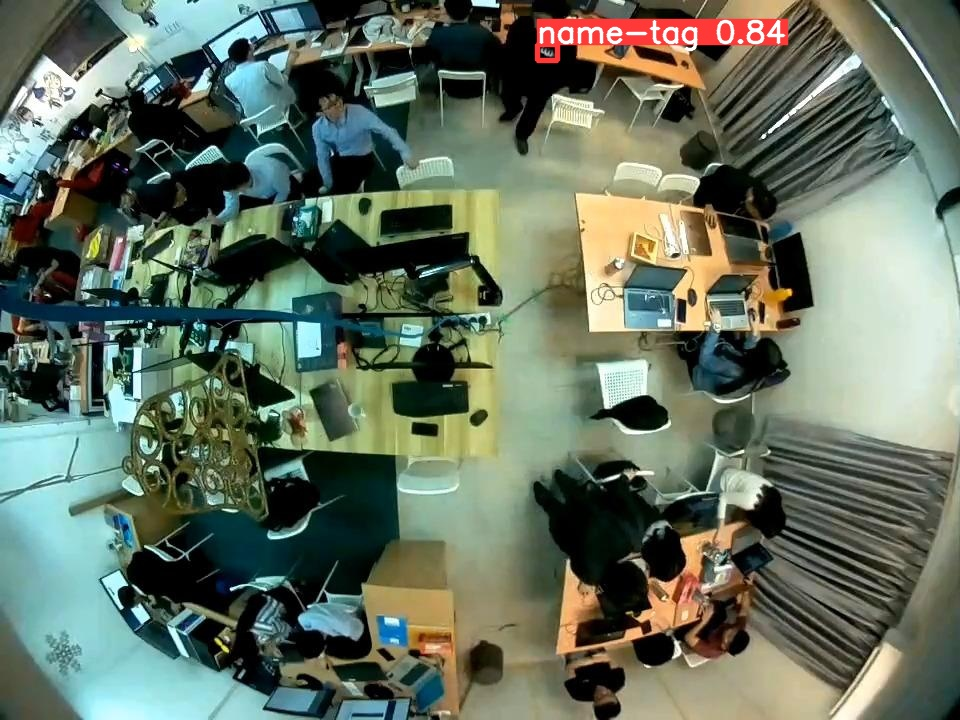

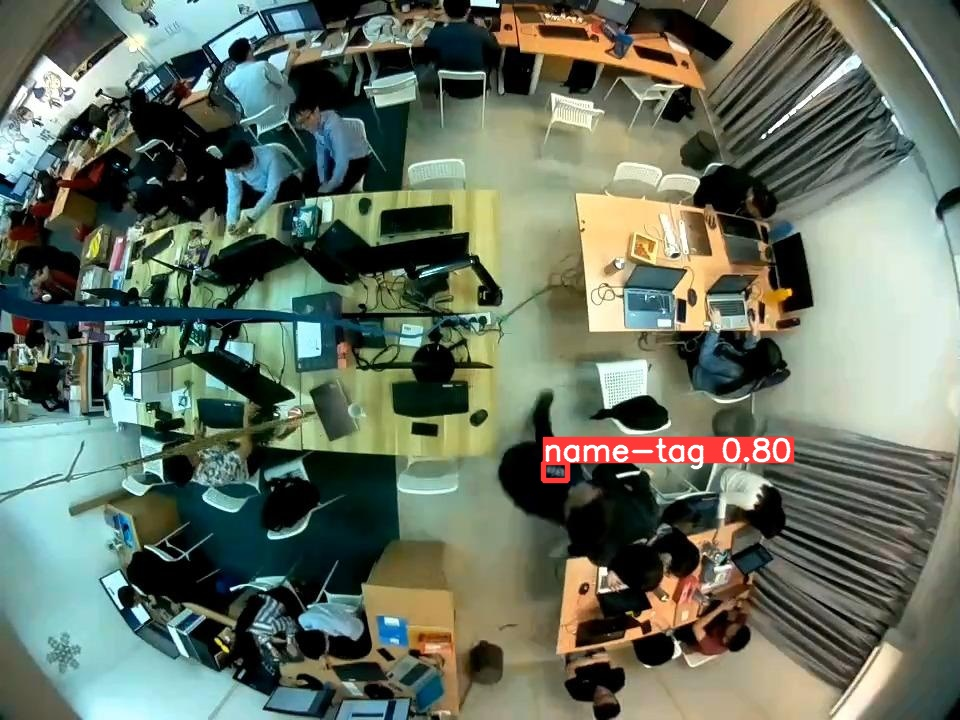

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

- used for predict sample.mp4 video

In [13]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/input/staff-attire-detect-sample-video/sample.mp4 save=True

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 71.4ms
video 1/1 (2/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.6ms
video 1/1 (3/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (4/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.6ms
video 1/1 (5/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.6ms
video 1/1 (6/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (7/1341)

- check the result in the saved predict folder

In [14]:
# Created output zip file
!zip -r staff_attire_detect_output.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/datasets/ (stored 0%)
  adding: kaggle/working/datasets/Staff-Attire-Identification-4/ (stored 0%)
  adding: kaggle/working/datasets/Staff-Attire-Identification-4/train/ (stored 0%)
  adding: kaggle/working/datasets/Staff-Attire-Identification-4/train/images/ (stored 0%)
  adding: kaggle/working/datasets/Staff-Attire-Identification-4/train/images/sample_mp4-818_jpg.rf.1622d99d1881466632d126273a05dee6.jpg (deflated 0%)
  adding: kaggle/working/datasets/Staff-Attire-Identification-4/train/images/sample_mp4-1199_jpg.rf.3bd3d88ebec1fdaee1d8bbf58a0d062a.jpg (deflated 0%)
  adding: kaggle/working/datasets/Staff-Attire-Identification-4/train/images/sample_mp4-469_jpg.rf.2f5267be33868766d3d033563d02bdcb.jpg (deflated 0%)
  adding: kaggle/working/datasets/Staff-Attire-Identification-4/train/images/sample_mp4-386_jpg.rf.e0535d2fa394bb1c1515884bdc3e7f70.jpg (deflated 2%)
  addin